In [1]:
import pandas as pd
import numpy as np
import sklearn
import faiss

import spacy

# nlp = spacy.load('en_core_web_md')

from sentence_transformers import SentenceTransformer
import scipy.spatial

import pickle

In [23]:
def load_df(course_type):
    # course_type: credit course or online course
    # credit f21: take in free_text_f_21.csv
    # credit w22: take in free_text_w_22.csv
    # online course: take in online df
    
    if course_type == 'Fall 2021':
        df = pd.read_csv('C:/Users/hEBE2/assets/free_text_f_21.csv')
        corpus = df['text'].tolist()
        corpus_embeddings_file = 'C:/Users/hEBE2/assets/corpus_embeddings_f_21.pkl'
        embedder_file = 'C:/Users/hEBE2/assets/embedder_f_21.pkl'
        
    elif course_type == 'Winter 2022':
        df = pd.read_csv('C:/Users/hEBE2/assets/free_text_w_22.csv')
        corpus = df['text'].tolist()
        corpus_embeddings_file = 'C:/Users/hEBE2/assets/corpus_embeddings_w_22.pkl'
        embedder_file = 'C:/Users/hEBE2/assets/embedder_w_22.pkl'
        
    elif course_type == 'online':
        df = pd.read_csv('C:/Users/hEBE2/assets/original/2021-10-19-MichiganOnline-courses.csv')
        corpus = df['description'].tolist()
        corpus_embeddings_file = 'C:/Users/hEBE2/assets/corpus_embeddings_online.pkl'
        embedder_file = 'C:/Users/hEBE2/assets/embedder_online.pkl'
        
    return df, corpus_embeddings_file, embedder_file, corpus

In [24]:
def load_sentence_transformer(course_type):
    # course_type: credit course or online course
    # credit course: take in free_text_fw.csv
    # online course: take in online df
    
    df, corpus_embeddings_file, embedder_file, corpus = load_df(course_type)

    #Load sentences & embeddings from disc
    with open(corpus_embeddings_file, "rb") as fIn:
        stored_data = pickle.load(fIn)
        stored_corpus = stored_data['corpus']
        stored_embeddings = stored_data['embeddings']

    with open(embedder_file, "rb") as fIn:
        stored_embedder = pickle.load(fIn)
        
    return df, stored_data, stored_corpus, stored_embeddings, stored_embedder, corpus

In [28]:
df, stored_data, stored_corpus, stored_embeddings, stored_embedder, corpus = load_sentence_transformer('Fall 2021')

In [71]:
def recommender(course_type, queries, k):
    # query free text input from user about his interest
    # we want to see k nearest neighbors of query
    
    df, stored_data, stored_corpus, stored_embeddings, stored_embedder, corpus = load_sentence_transformer(course_type)

    d= 768
    index = faiss.IndexFlatL2(d)
    index.add(np.stack(stored_embeddings, axis=0))   

    query_embeddings = stored_embedder.encode(queries)
    D, I = index.search(query_embeddings, k)     # actual search


    df_1 = df[['course', 'Course Title','description']]
    res = [df_1.iloc[I[i]] for i in range(len(queries))]

    l_dis = []
    for query, query_embedding in zip(queries, query_embeddings):
        distances, indices = index.search(np.asarray(query_embedding).reshape(1,768),k)        
        l_dis.append([distances[0,idx] for idx in range(0,k)])

    return(res, l_dis)

    '''
    for query, query_embedding in zip(queries, query_embeddings):
        distances, indices = index.search(np.asarray(query_embedding).reshape(1,768),k)
        print("\n======================\n")
        print("Query:", query)
        print("\nTop 5 most similar sentences in corpus:")
        for idx in range(0,k):
            print(corpus[indices[0,idx]], "(Distance: %.4f)" % distances[0,idx])
    '''

In [56]:
query_1 = input("Enter your interest 1, the more precise your text is, the more specific the recommandation will be: ")
query_2 = input("Enter your interest 2, the more precise your text is, the more specific the recommandation will be: ")
query_3 = input("Enter your interest 3, the more precise your text is, the more specific the recommandation will be: ")
query_4 = input("Enter your interest 4, the more precise your text is, the more specific the recommandation will be: ")
query_5 = input("Enter your interest 5, the more precise your text is, the more specific the recommandation will be: ")



In [57]:
print(query_1)
print(query_2)
print(query_3)
print(query_4)
print(query_5)

Hello world 
I like computer science, especially application in maths
I like biologics and their application in medecine 
I like pop culture, especially Asian movies
I am interested in history, politics, especially US politics 


In [58]:
queries =[query_1, query_2, query_3, query_4,query_5]
print(queries)

['Hello world ', 'I like computer science, especially application in maths', 'I like biologics and their application in medecine ', 'I like pop culture, especially Asian movies', 'I am interested in history, politics, especially US politics ']


In [78]:
#recommender('Fall 2021', queries, 10)

In [79]:
# list of dfs 
dfs = recommender('Fall 2021', queries, 20)[0]

# list of distance 
dis = recommender('Fall 2021', queries, 20)[1]

In [87]:
import matplotlib.pyplot as plt
def vis(df, dis, title):
    fig, ax = plt.subplots()

    ax.set_xticks(range(len(dis)))
    ax.set_xticklabels(list(df['Course Title']), minor=False, rotation=90)
    ax.plot(dis, linewidth=2.0)
    plt.title('Distance to'+' '+ "'"+ title +"'")

    plt.show()

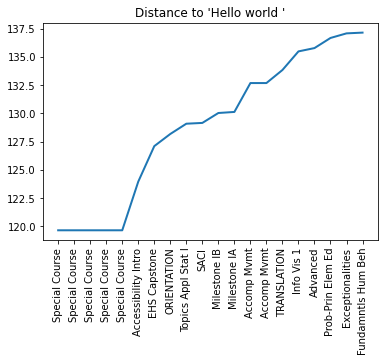

In [88]:
vis(dfs[0], dis[0], queries[0])

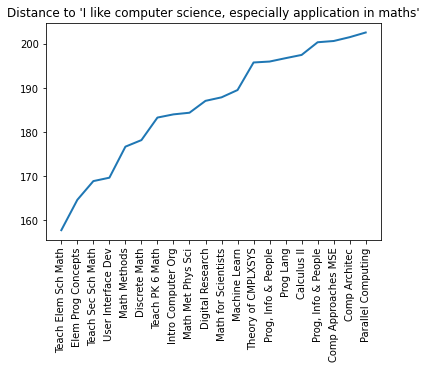

In [89]:
vis(dfs[1], dis[1], queries[1])

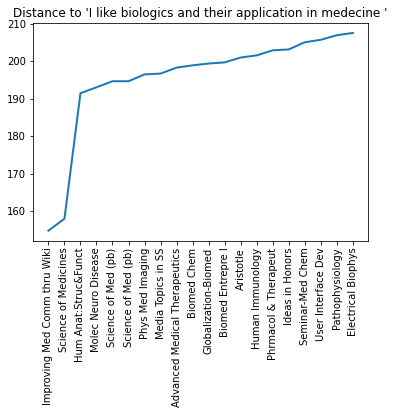

In [90]:
vis(dfs[2], dis[2], queries[2])

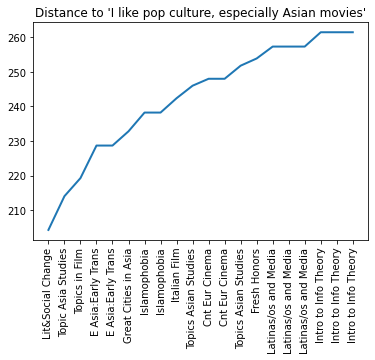

In [91]:
vis(dfs[3], dis[3], queries[3])